In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [2]:
train_transformer = torchvision.transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    # transforms.ColorJitter(
    #     brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2
    # ),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    # transforms.RandomPerspective(),
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Files already downloaded and verified


Files already downloaded and verified


In [3]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [5]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [6]:
k = len(set(train_dataset.targets))
print("number of classes: ", k)

number of classes:  10


In [7]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [8]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=1, shuffle=True
)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    print(y)
    break

tensor([[[[0.9882, 0.9725, 0.9725,  ..., 0.9569, 0.9608, 0.9608],
          [1.0000, 0.9843, 0.9882,  ..., 0.9725, 0.9725, 0.9725],
          [0.9961, 0.9804, 0.9843,  ..., 0.9686, 0.9686, 0.9647],
          ...,
          [0.9255, 0.8118, 0.7373,  ..., 0.7725, 0.7843, 0.6902],
          [0.9216, 0.8118, 0.7412,  ..., 0.7098, 0.7294, 0.6863],
          [0.9098, 0.7569, 0.6235,  ..., 0.7176, 0.7373, 0.7216]],

         [[0.9882, 0.9725, 0.9725,  ..., 0.9608, 0.9608, 0.9569],
          [1.0000, 0.9843, 0.9882,  ..., 0.9765, 0.9765, 0.9686],
          [0.9961, 0.9804, 0.9843,  ..., 0.9725, 0.9725, 0.9647],
          ...,
          [0.9255, 0.8039, 0.7098,  ..., 0.6784, 0.6980, 0.6275],
          [0.9176, 0.8039, 0.7137,  ..., 0.6549, 0.6745, 0.6314],
          [0.9098, 0.7451, 0.5922,  ..., 0.6824, 0.7020, 0.6784]],

         [[0.9804, 0.9647, 0.9647,  ..., 0.9412, 0.9451, 0.9412],
          [0.9922, 0.9765, 0.9804,  ..., 0.9569, 0.9569, 0.9529],
          [0.9922, 0.9765, 0.9804,  ..., 0

In [9]:
class CNN(nn.Module):
    def __init__(self, k):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
        )
        
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, k)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        
        x = f.dropout(x, p = 0.5)
        x = f.relu(self.fc1(x))
        x = f.dropout(x, p = 0.2)
        x = self.fc2(x)      
        
        return x

In [10]:
model = CNN(k)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = []
    test_losses = []
    
    for i in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            
            output = model(inputs)
            loss = criterion(output, targets)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            
        train_loss = np.mean(train_loss)
        
        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            loss = criterion(output, targets)
            test_loss.append(loss.item())
        
        test_loss = np.mean(test_loss)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        dt = datetime.now() - t0
        
        print(f"epoch {i + 1}/{epochs}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}, duration: {dt}")
        
    return train_losses, test_losses

In [14]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=80)

epoch 1/80, train_loss: 1.2523, test_loss: 0.9786, duration: 0:00:15.529118
epoch 2/80, train_loss: 0.8106, test_loss: 0.7966, duration: 0:00:16.313042
epoch 3/80, train_loss: 0.6543, test_loss: 0.6897, duration: 0:00:14.057065
epoch 4/80, train_loss: 0.5527, test_loss: 0.6848, duration: 0:00:13.923228
epoch 5/80, train_loss: 0.4841, test_loss: 0.6457, duration: 0:00:13.822645
epoch 6/80, train_loss: 0.4208, test_loss: 0.6378, duration: 0:00:13.864293
epoch 7/80, train_loss: 0.3697, test_loss: 0.6487, duration: 0:00:13.567522
epoch 8/80, train_loss: 0.3272, test_loss: 0.6194, duration: 0:00:13.780024
epoch 9/80, train_loss: 0.2979, test_loss: 0.6649, duration: 0:00:13.487665
epoch 10/80, train_loss: 0.2664, test_loss: 0.6789, duration: 0:00:13.434254
epoch 11/80, train_loss: 0.2506, test_loss: 0.6741, duration: 0:00:13.063720
epoch 12/80, train_loss: 0.2254, test_loss: 0.7036, duration: 0:00:12.590382
epoch 13/80, train_loss: 0.1998, test_loss: 0.7454, duration: 0:00:12.595308
epoch 14

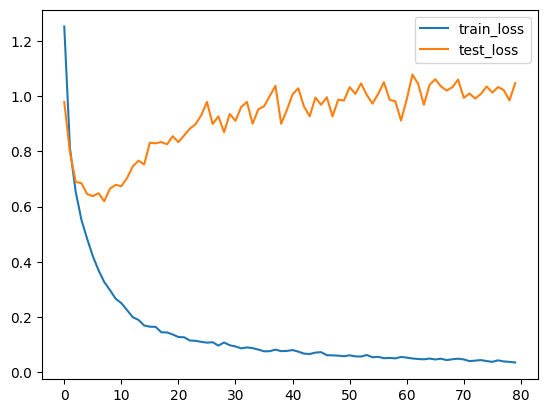

In [15]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()
plt.show()

In [16]:
model.eval()

def calculate_acc(data_loader):
    n_correct = 0
    n_total = 0

    for inputs, targets in data_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        
        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]
        
    acc = n_correct / n_total
    return acc

In [17]:
train_acc = calculate_acc(train_loader)
test_acc = calculate_acc(test_loader)

print(f"train_acc: {train_acc}, test_acc: {test_acc}")

train_acc: 0.98884, test_acc: 0.832


In [18]:
def plot_confusion_matrix_sns(cm,
                          labels,  
                          normalized=False, 
                          title="confusion_matrix", 
                          cmap=plt.cm.Blues):
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion_matrix without normalization")
        
    print(cm)
    
    fmt = '.2f' if normalized else 'd'
    
    sns.heatmap(cm, cmap=cmap, annot=True, fmt=fmt, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.tight_layout()
    # plt.xticks(classes, labels, rotation=90)
    # plt.yticks(classes, labels, rotation=0)
    plt.ylabel("True label")
    plt.xlabel("predicted label")
    plt.show()

In [19]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

confusion_matrix without normalization
[[875   7  28  16   6   3   2   9  36  18]
 [  8 935   6   2   2   2   7   1   5  32]
 [ 46   4 763  49  39  44  32  17   4   2]
 [ 14   4  50 683  39 116  44  34   9   7]
 [ 13   2  53  48 795  24  26  34   2   3]
 [  5   2  29 106  26 776  13  35   3   5]
 [  7   4  36  43  15  15 863   7   7   3]
 [ 13   1  22  29  30  23   1 871   3   7]
 [ 40  20   7   6   5   0   4   3 908   7]
 [ 17  66   6   7   0   3   2   7  14 878]]


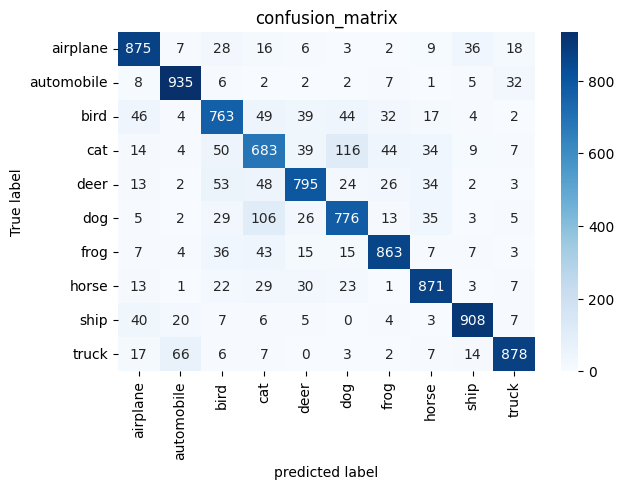

In [20]:
# x_test = test_dataset.data.numpy()
# y_test = test_dataset.targets.numpy()
x_test = test_dataset.data
y_test = test_dataset.targets
p_test = np.array([])

for inputs, targets in test_loader:
    inputs = inputs.to(device)
    
    outputs = model(inputs)
    
    _, predictions = torch.max(outputs, 1)
    
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
    
# classes = np.sort(np.unique(y_test))
cm = confusion_matrix(y_test, p_test, labels=np.sort(np.unique(y_test)))
plot_confusion_matrix_sns(cm, labels)

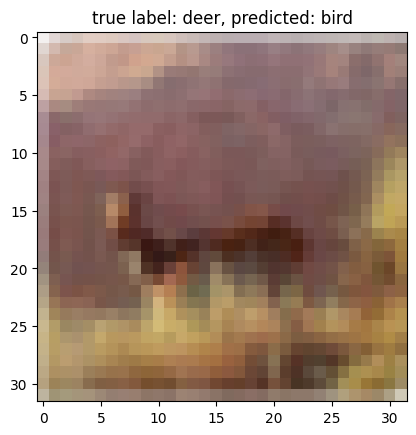

In [21]:
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title(f"true label: {labels[y_test[i]]}, predicted: {labels[int(p_test[i])]}")
plt.show()

In [22]:
summary(model, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─BatchNorm2d: 2-3                  [-1, 32, 32, 32]          64
|    └─Conv2d: 2-4                       [-1, 32, 32, 32]          9,248
|    └─ReLU: 2-5                         [-1, 32, 32, 32]          --
|    └─BatchNorm2d: 2-6                  [-1, 32, 32, 32]          64
|    └─MaxPool2d: 2-7                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-8                       [-1, 64, 16, 16]          18,496
|    └─ReLU: 2-9                         [-1, 64, 16, 16]          --
|    └─BatchNorm2d: 2-10                 [-1, 64, 16, 16]          128
|    └─Conv2d: 2-11                      [-1, 64, 16, 16]          36,928
| 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─BatchNorm2d: 2-3                  [-1, 32, 32, 32]          64
|    └─Conv2d: 2-4                       [-1, 32, 32, 32]          9,248
|    └─ReLU: 2-5                         [-1, 32, 32, 32]          --
|    └─BatchNorm2d: 2-6                  [-1, 32, 32, 32]          64
|    └─MaxPool2d: 2-7                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-8                       [-1, 64, 16, 16]          18,496
|    └─ReLU: 2-9                         [-1, 64, 16, 16]          --
|    └─BatchNorm2d: 2-10                 [-1, 64, 16, 16]          128
|    └─Conv2d: 2-11                      [-1, 64, 16, 16]          36,928
| 